In [1]:
import altair as alt

# saving data into a file rather than embedding into the chart
alt.data_transformers.enable('json')

#alt.renderers.enable('notebook')
# alt.renderers.enable('jupyterlab')
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [2]:
from vega_datasets import data

zipcodes_url = data.zipcodes.url # passing url instead of a dataframe to `alt.Chart` minimizes errors
zipcodes = data.zipcodes()
zipcodes.head()


,zip_code,latitude,longitude,city,state,county
0,00501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,00544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,00601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,00602,18.393103,-67.180953,Aguada,PR,Aguada
4,00603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [3]:
zipcodes = data.zipcodes(dtype={'zip_code': 'category'})
zipcodes.head()

,zip_code,latitude,longitude,city,state,county
0,00501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,00544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,00601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,00602,18.393103,-67.180953,Aguada,PR,Aguada
4,00603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [4]:
zipcodes.zip_code.dtype

CategoricalDtype(categories=['00501', '00544', '00601', '00602', '00603', '00604',
                  '00605', '00606', '00610', '00611',
                  ...
                  '99919', '99921', '99922', '99923', '99925', '99926',
                  '99927', '99928', '99929', '99950'],
                 ordered=False)

In [5]:
alt.Chart(zipcodes_url).mark_circle().encode(
    x='longitude:Q',
    y='latitude:Q',
)

alt.Chart(...)

In [6]:
alt.Chart(zipcodes_url).mark_circle(size=10, color='green').encode(
    x='longitude:Q',
    y='latitude:Q',
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

In [7]:
alt.Chart(zipcodes_url).mark_circle(size=10, color='green').encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
).properties(
    width=650,
    height=400
)

alt.Chart(...)

In [8]:
alt.Chart(zipcodes_url).mark_circle(size=10, color='green').encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
).properties(
    width=650,
    height=400
).project(type='albersUsa')

alt.Chart(...)

In [9]:
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'first_digit', substring(datum.zip_code, 0, 1)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='first_digit:N',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

# Task 4.2
The zipcode digits that start from 0 are in the upper East Coast, those that start with 9 are in the West Coast. The order evidently starts from the northern East, to the southern East, to the Midwest, then to the West at last. Hence, the number grows from the east coast to the west. 

In [10]:
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0, 2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:N',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

In [11]:
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0, 2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:O',
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

In [12]:
from altair.expr import datum, substring

alt.Chart(zipcodes_url).mark_circle(size=2).transform_calculate(
    'two_digits', substring(datum.zip_code, 0, 2)
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='two_digits:N',
    tooltip = 'zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=700,
    height=400,
)

alt.Chart(...)

In [13]:
usmap = data.us_10m()
usmap.keys()

dict_keys(['type', 'transform', 'objects', 'arcs'])

In [14]:
usmap['type']

'Topology'

In [15]:
usmap['transform']

{'scale': [0.003589294092944858, 0.0005371535195261037],
 'translate': [-179.1473400003406, 17.67439566600018]}

In [16]:
usmap['objects'].keys()

dict_keys(['counties', 'states', 'land'])

In [17]:
usmap['objects']['land']['type'], usmap['objects']['states']['type'], usmap['objects']['counties']['type']

('MultiPolygon', 'GeometryCollection', 'GeometryCollection')

In [18]:
state1 = usmap['objects']['states']['geometries'][1]
state1

{'type': 'MultiPolygon',
 'arcs': [[[10337]],
  [[10342]],
  [[10341]],
  [[10343]],
  [[10834, 10340]],
  [[10344]],
  [[10345]],
  [[10338]]],
 'id': 15}

In [19]:
usmap['arcs'][:10]

[[[15739, 57220], [0, 0]],
 [[15739, 57220], [29, 62], [47, -273]],
 [[15815, 57009], [-6, -86]],
 [[15809, 56923], [0, 0]],
 [[15809, 56923], [-36, -8], [6, -210], [32, 178]],
 [[15811, 56883], [9, -194], [44, -176], [-29, -151], [-24, -319]],
 [[15811, 56043], [-12, -216], [26, -171]],
 [[15825, 55656], [-2, 1]],
 [[15823, 55657], [-19, 10], [26, -424], [-26, -52]],
 [[15804, 55191], [-30, -72], [-47, -344]]]

In [20]:
states = alt.topo_feature(data.us_10m.url, 'states')

In [21]:
states

UrlData({
  format: TopoDataFormat({
    feature: 'states',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})

In [22]:
import altair as alt
from vega_datasets import data

url = data.zipcodes.url

alt.Chart(states).mark_geoshape()


alt.Chart(...)

In [23]:
import altair as alt
from vega_datasets import data

url = data.zipcodes.url

alt.Chart(states).mark_geoshape().encode(
).project(
        type='albersUsa'
    )

alt.Chart(...)

In [24]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
alt.Chart(counties).mark_geoshape().encode(
).project(
        type='albersUsa'
    )

alt.Chart(...)

In [25]:
unemp_data = data.unemployment(sep='\t')
unemp_data.head()

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099


In [26]:
us_counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url #using a url in the lookup below
alt.Chart(us_counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

In [27]:
conda install datashader bokeh holoviews

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

import pandas as pd
import datashader as ds
from datashader import transfer_functions as tf
from colorcet import fire

In [3]:
nyctaxi_small = pd.read_csv('datasets/nyc_taxi_data_2014.csv', nrows=10000, 
                            usecols=['dropoff_longitude', 'dropoff_latitude'])
nyctaxi_small.head()

,dropoff_longitude,dropoff_latitude
0,-73.982227,40.731790
1,-73.960449,40.763995
2,-73.986626,40.765217
3,-73.979863,40.777050
4,-73.984367,40.720524


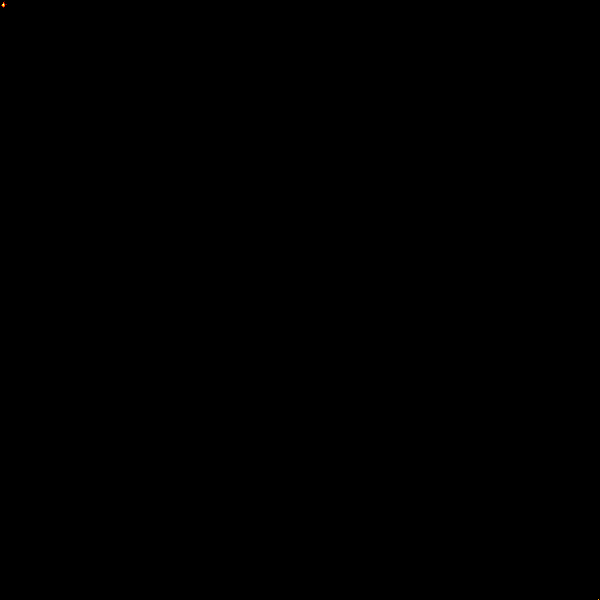

In [4]:
agg = ds.Canvas().points(nyctaxi_small, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")

In [5]:
nyctaxi_small.isnull().values.any()

True

In [6]:
nyctaxi_small.dropna()

,dropoff_longitude,dropoff_latitude
0,-73.982227,40.731790
1,-73.960449,40.763995
2,-73.986626,40.765217
3,-73.979863,40.777050
4,-73.984367,40.720524
...,...,...
9995,-73.990344,40.739028
9996,-73.975818,40.763701
9997,-73.973647,40.787233
9998,-73.973057,40.751087


In [7]:
nyctaxi_small_filtered = nyctaxi_small.dropna()
print(nyctaxi_small_filtered)

      dropoff_longitude  dropoff_latitude
0            -73.982227         40.731790
1            -73.960449         40.763995
2            -73.986626         40.765217
3            -73.979863         40.777050
4            -73.984367         40.720524
...                 ...               ...
9995         -73.990344         40.739028
9996         -73.975818         40.763701
9997         -73.973647         40.787233
9998         -73.973057         40.751087
9999         -73.975406         40.752156

[9999 rows x 2 columns]


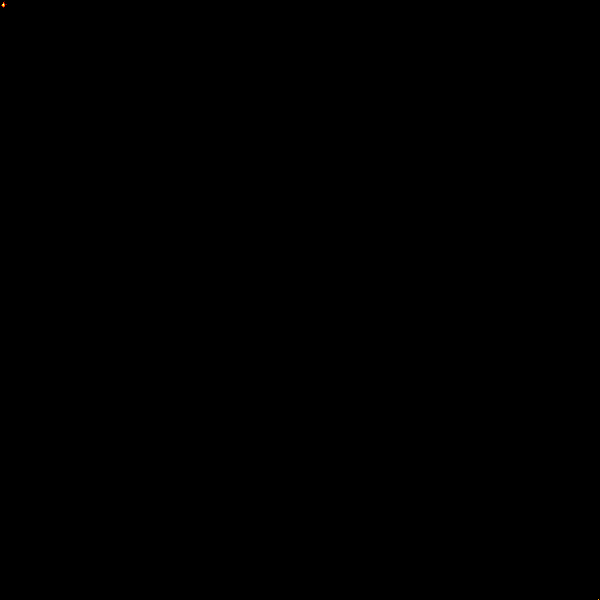

In [8]:
agg = ds.Canvas().points(nyctaxi_small_filtered, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire), "black")

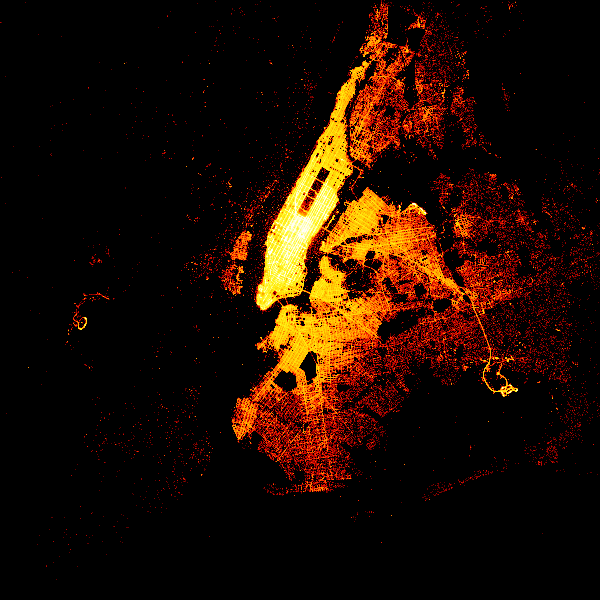

In [22]:
nyctaxi_small = pd.read_csv('datasets/nyc_taxi_data_2014.csv',
                            usecols=['dropoff_longitude', 'dropoff_latitude'])
nyctaxi_small_filtered = nyctaxi_small.dropna()

nyc = nyctaxi_small_filtered[nyctaxi_small_filtered["dropoff_longitude"].between(-74.257159, -73.699215, inclusive = True)]
nyc = nyc[nyc["dropoff_latitude"].between(40.4937284, 40.915568, inclusive = True)]
#nyc = nyctaxi_small_filtered[nyc]
agg = ds.Canvas().points(nyc, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire), "black")

In [20]:
nyctaxi_small = pd.read_csv('datasets/nyc_taxi_data_2014.csv', nrows=10000, 
                            usecols=['dropoff_longitude', 'dropoff_latitude'])
nyctaxi_small_filtered = nyctaxi_small.dropna()

nyc = nyctaxi_small_filtered[nyctaxi_small_filtered["dropoff_longitude"].between(-74.257159, -72.699215, inclusive = True)]
nyc = nyc[nyctaxi_small_filtered["dropoff_latitude"].between(40.4937284, 40.915568, inclusive = True)]
nyc
# nyc = nyctaxi_small_filtered[nyc]
# agg = ds.Canvas().points(nyc, 'dropoff_longitude', 'dropoff_latitude')
# tf.set_background(tf.shade(agg, cmap=fire), "black")

<ipython-input-20-5b9c5cf7ce2c>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nyc = nyc[nyctaxi_small_filtered["dropoff_latitude"].between(40.4937284, 40.915568, inclusive = True)]


,dropoff_longitude,dropoff_latitude
0,-73.982227,40.731790
1,-73.960449,40.763995
2,-73.986626,40.765217
3,-73.979863,40.777050
4,-73.984367,40.720524
...,...,...
9995,-73.990344,40.739028
9996,-73.975818,40.763701
9997,-73.973647,40.787233
9998,-73.973057,40.751087


In [37]:
nyctaxi_small = pd.read_csv('datasets/nyc_taxi_data_2014.csv', nrows=20000, 
                            usecols=['dropoff_longitude', 'dropoff_latitude'])
nyctaxi_small.tail()

,dropoff_longitude,dropoff_latitude
19995,-73.967412,40.756467
19996,-73.990592,40.754235
19997,-73.981908,40.782087
19998,-74.009005,40.731926
19999,-73.980556,40.730439


In [38]:
nyctaxi_small.loc[nyctaxi_small['dropoff_longitude'] <= -73.990344]

,dropoff_longitude,dropoff_latitude
21,-73.996002,40.726658
24,-73.994747,40.724134
28,-73.994019,40.750252
30,-73.995738,40.741028
39,-73.995642,40.697605
...,...,...
19983,-74.001677,40.727411
19986,-73.996547,40.738003
19993,-73.995375,40.755443
19996,-73.990592,40.754235


In [39]:
nyctaxi_small.loc[nyctaxi_small['dropoff_longitude'] >= -71]

,dropoff_longitude,dropoff_latitude
85,0.0,0.0
91,0.0,0.0
140,0.0,0.0
164,0.0,0.0
213,0.0,0.0
...,...,...
19838,0.0,0.0
19853,0.0,0.0
19886,0.0,0.0
19895,0.0,0.0


In [40]:
nyctaxi_small.loc[nyctaxi_small['dropoff_latitude'] >= 40.79]

,dropoff_longitude,dropoff_latitude
26,-73.976644,40.790889
35,-73.968302,40.791962
36,-73.958182,40.800848
48,-73.954252,40.803059
109,-73.936871,40.808291
...,...,...
19964,-73.975217,40.790390
19969,-73.858564,40.834999
19981,-73.935611,40.796102
19984,-73.879039,40.882506


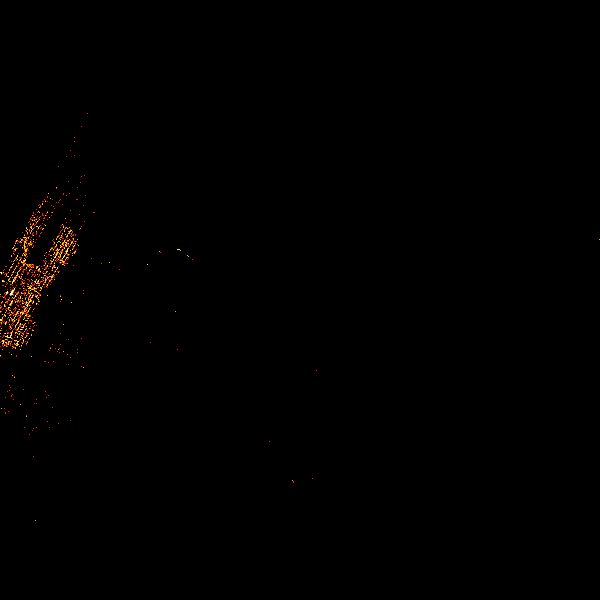

In [79]:
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd

nyctaxi_small = pd.read_csv('datasets/nyc_taxi_data_2014.csv', nrows=10000, 
                            usecols=['dropoff_longitude', 'dropoff_latitude'])

nyc = nyc[nyc_new]

agg = ds.Canvas().points(nyc, 'dropoff_longitude', 'dropoff_latitude')
tf.set_background(tf.shade(agg, cmap=fire),"black")


In [81]:
from bokeh.plotting import figure, output_notebook, show

In [82]:
output_notebook()

Loading BokehJS ...

In [83]:
NYC = x_range, y_range = ((-74.05, -73.7), (40.6, 40.9))

plot_width = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan, wheel_zoom, reset', plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
              x_range=x_range, y_range=y_range, outline_line_color=None,
              min_border=0, min_border_left=0, min_border_right=0,
              min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

options = dict(line_color=None, fill_color='blue', size=5)


In [85]:
import datashader as ds
from datashader import transfer_functions as tr_fns

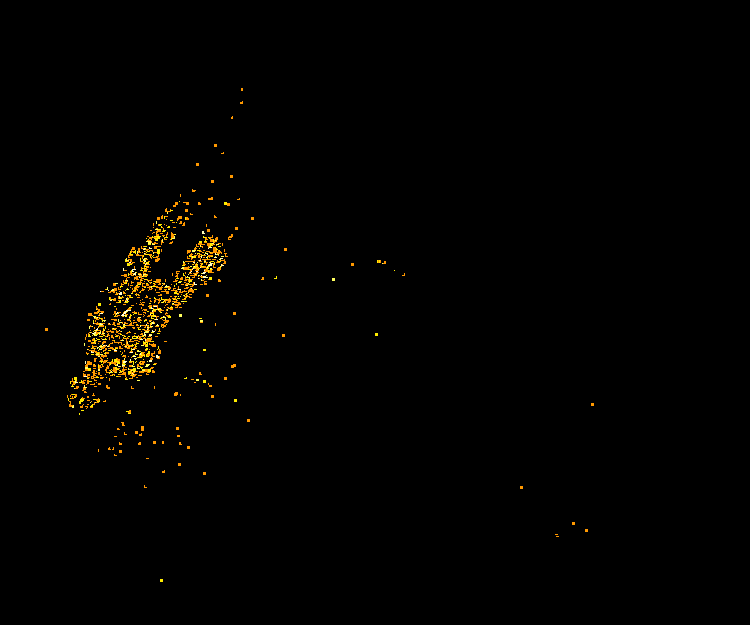

In [93]:
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno

background = "black"
export = partial(export_image, export_path="export", background="black")
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(nyctaxi_small, 'dropoff_longitude', 'dropoff_latitude')
    img = tr_fns.shade(agg, cmap=Hot, how='eq_hist')
    return tr_fns.dynspread(img, threshold=0.8, max_px=8)

p = base_plot(background_fill_color=background)
export(create_image(*NYC), "NYCT_hot")
